# SUPERVISED MACHINE LEARNING - Task 2 (Regression)

### TASK - To predict the percentage of marks that a student is expected to score based upon the number of hours    they studied (9.25 hours)

In [1]:
## Importing initial required libraries for regression task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline 

### Reading Students data into dataframe for Analysis

In [2]:
stud_data = pd.read_csv("http://bit.ly/w-data")
print (stud_data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


### Data Analysis/Overview

In [3]:
print (stud_data.shape)
print (stud_data.describe())

(25, 2)
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


### Data Visualization

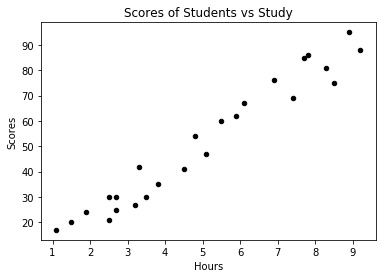

In [4]:
stud_data.plot(x='Hours', y='Scores', kind='scatter', color='black')
plt.title('Scores of Students vs Study')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### A linear pattern can be noticed from the scatter plot above. A fitting line would look nice!

### Allocating input-output values to dataset

In [5]:
inp = stud_data.iloc[:,:-1].values #in hours
out = stud_data.iloc[:, 1].values #in percentages
print (inp)
print (out)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting Dataset to avoid Ovefitting

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.2, random_state=42)

### Fitting Regressor Algorithm on Training Set

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit (X_train, y_train)
print ('Training model Complete')

print ('R-squared score (Training):', reg.score(X_train, y_train)) #how best this model is

print ('slope of best fit:', reg.coef_)
print ()
print ('Intercept of plot:', reg.intercept_)

Training model Complete
R-squared score (Training): 0.9491209376364417
slope of best fit: [9.68207815]

Intercept of plot: 2.826892353899737


### Plotting A Fitting Line

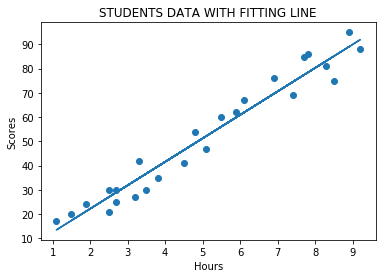

In [8]:
fit_line = (reg.coef_ * inp+reg.intercept_)# Equation of required line

plt.scatter(inp, out)
plt.plot(inp, fit_line);
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('STUDENTS DATA WITH FITTING LINE')
plt.show()

### Predictions 

In [9]:
y_pred = reg.predict(X_test)
print (y_pred)
print (X_test)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [10]:
# Comparing predicted to actual
comp = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
comp

,Predicted,Actual
0,83.188141,81
1,27.032088,30
2,27.032088,21
3,69.633232,76
4,59.951153,62


## Question: What will be predicted score if a student study for 9.25 hrs in a day?

In [11]:
study_hour = 9.25
study_pred = reg.predict([[study_hour]])
print(f'For {study_hour} hours, the predicted score is {study_pred[0]}')

For 9.25 hours, the predicted score is 92.38611528261494


### Model Evaluation

In [12]:
from sklearn import metrics
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rmse = math.sqrt(mse)
print ('Root Mean Squared Error:', rmse)
print ('R2_score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R2_score: 0.9678055545167994
